## Togo Data

Step 1: data importing

In [11]:
import sys
sys.path.append('..')  # This adds the parent directory to the Python path
# notebooks/benin_analysis.ipynb

from scripts.data_loading import load_data, initial_exploration

# Load the data for Benin
togo_data = load_data('../src/togo-dapaong_qc.csv')

# Initial exploration
initial_exploration(togo_data)

First 5 rows of the data:
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       N

## Step 2: Data quality check

In [12]:
# notebooks/benin_analysis.ipynb

from scripts.data_quality import check_missing_values, check_duplicates, check_outliers, validate_data_types, calculate_summary_statistics

# Load the data for Benin
togo_data = load_data('../src/togo-dapaong_qc.csv')

# Check for missing values
missing_values = check_missing_values(togo_data)
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = check_duplicates(togo_data)
print(f"Number of Duplicate Rows: {duplicates}")

# Check for outliers
outliers = check_outliers(togo_data)
print("Outliers:\n", outliers)

# Validate data types
data_types = validate_data_types(togo_data)
print("Data Types:\n", data_types)

# Calculate summary statistics
summary_stats = calculate_summary_statistics(togo_data)
print("Summary Statistics:\n", summary_stats)


Missing Values:
 Comments    525600
dtype: int64
Number of Duplicate Rows: 0
Outliers:
 {'GHI': {'lower_bound': np.float64(-4.9), 'upper_bound': np.float64(1006.0), 'outlier_count': 10432}, 'DNI': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(847.2), 'outlier_count': 5255}, 'DHI': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(562.5), 'outlier_count': 5248}, 'ModA': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(988.0), 'outlier_count': 5251}, 'ModB': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(964.0), 'outlier_count': 5154}, 'Tamb': {'lower_bound': np.float64(18.0), 'upper_bound': np.float64(38.8), 'outlier_count': 10100}, 'RH': {'lower_bound': np.float64(6.9), 'upper_bound': np.float64(98.3), 'outlier_count': 9822}, 'WS': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(6.4), 'outlier_count': 4940}, 'WSgust': {'lower_bound': np.float64(0.0), 'upper_bound': np.float64(8.4), 'outlier_count': 4861}, 'WSstdev': {'lower_bound':

## Step 3: Data Cleaning

## 3.1 missing data

In [13]:
# notebooks/benin_analysis.ipynb

from scripts.data_cleaning import handle_missing_values

# Load the data for Benin
togo_data = load_data('../src/togo-dapaong_qc.csv')

# Handle missing values
togo_data_cleaned = handle_missing_values(togo_data)


sucessfully cleaned


## 3.2 outliers Treatment

In [14]:
# notebooks/benin_analysis.ipynb

from scripts.data_cleaning import treat_outliers

# Treat outliers
togo_data_cleaned_no_outliers = treat_outliers(togo_data_cleaned)


outliers removed!


In [15]:
# notebooks/benin_analysis.ipynb

from scripts.data_cleaning import treat_outliers

# Treat outliers
benin_data_cleaned_no_outliers = treat_outliers(togo_data)


outliers removed!


## 3.3 Final Data Preparation

In [16]:
# notebooks/benin_analysis.ipynb

from scripts.data_cleaning import final_data_preparation

# Final data preparation
togo_data_final = final_data_preparation(togo_data_cleaned_no_outliers)
if togo_data_final is not None:
    print('Successfully finished step 3: data cleaning')


Successfully finished step 3: data cleaning


## 4 Explatory Data Analysis

4.1 Time series Analysis

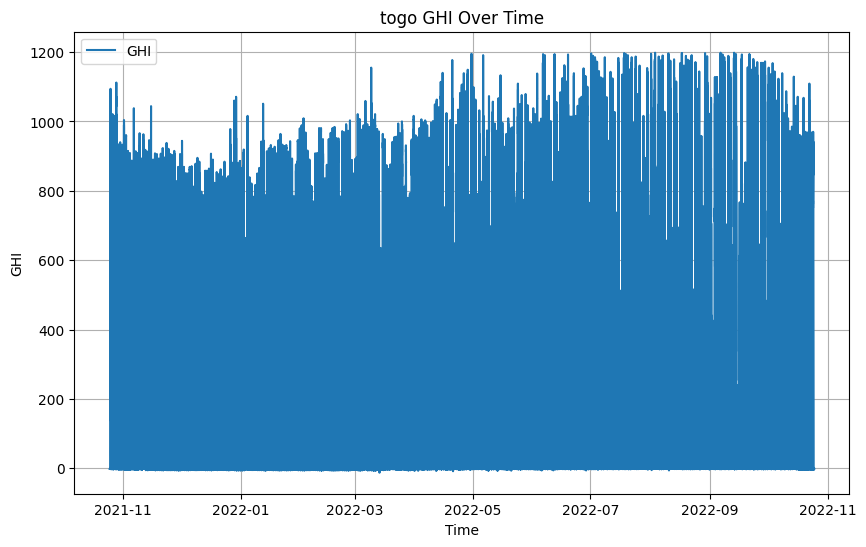

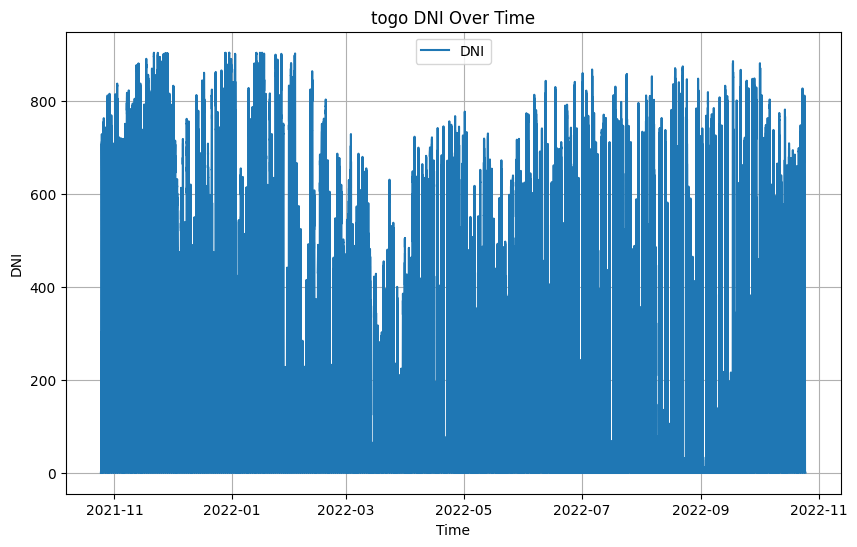

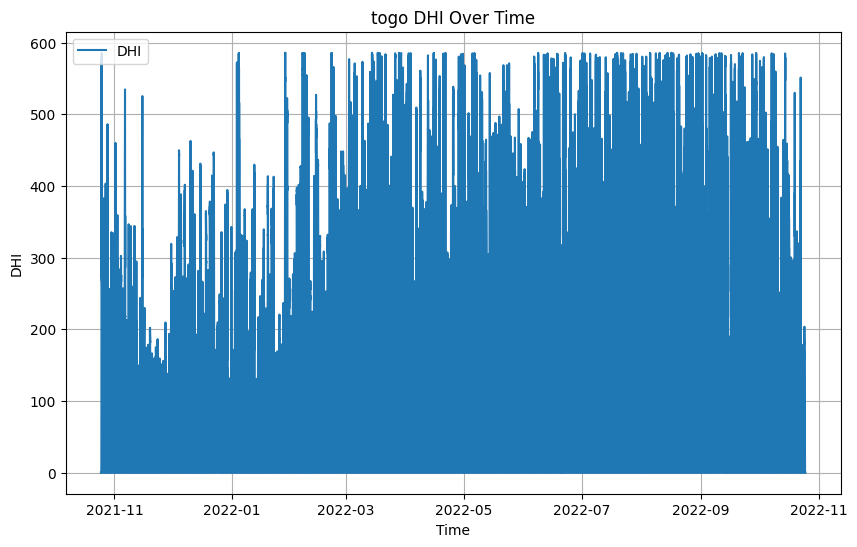

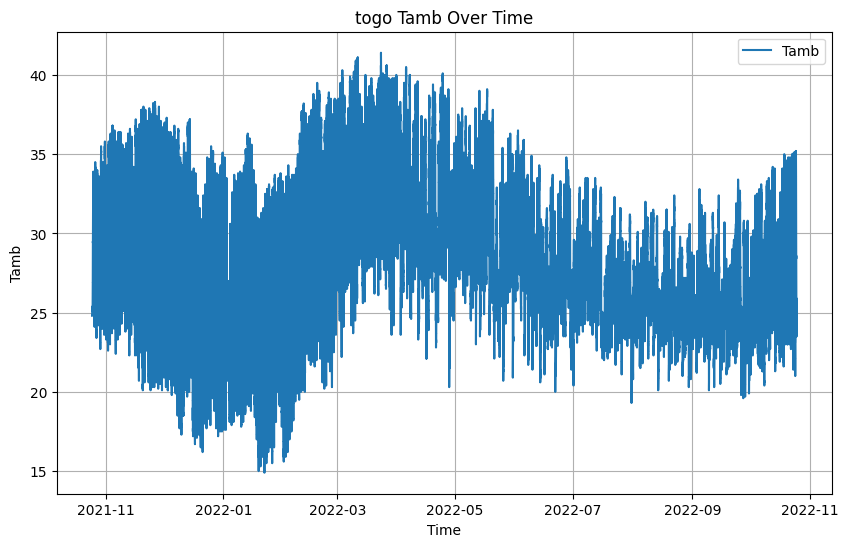

In [17]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_time_series

# Plot time series for GHI, DNI, DHI, and Tamb
plot_time_series(togo_data_final, ['GHI', 'DNI', 'DHI', 'Tamb'], title_prefix='togo')


4.2 Correlation Analysis

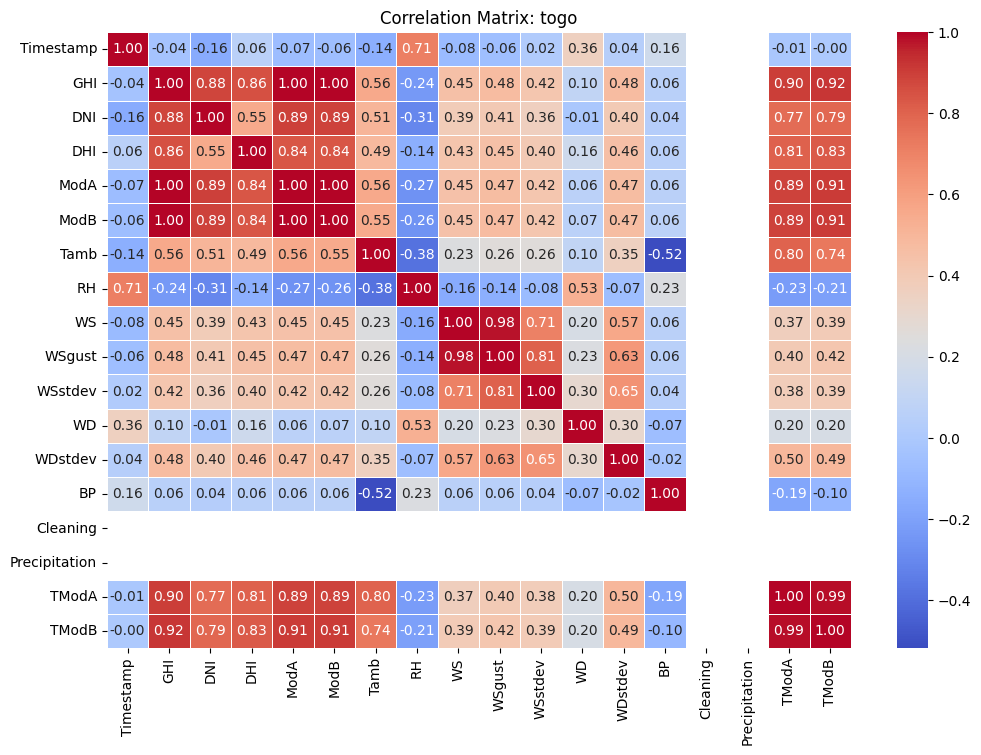

In [18]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_correlation_heatmap

# Plot correlation heatmap
plot_correlation_heatmap(togo_data_final, title='togo')


4.4 Temperature and Humidity Analysis

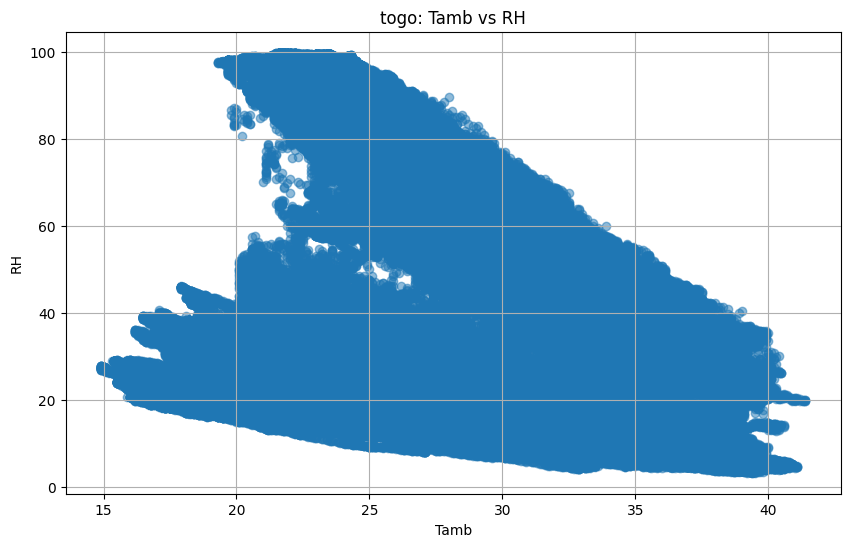

In [19]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_scatter

# Plot scatter for temperature and relative humidity
plot_scatter(togo_data_final, x_col='Tamb', y_col='RH', title='togo')


4.5 Histogram

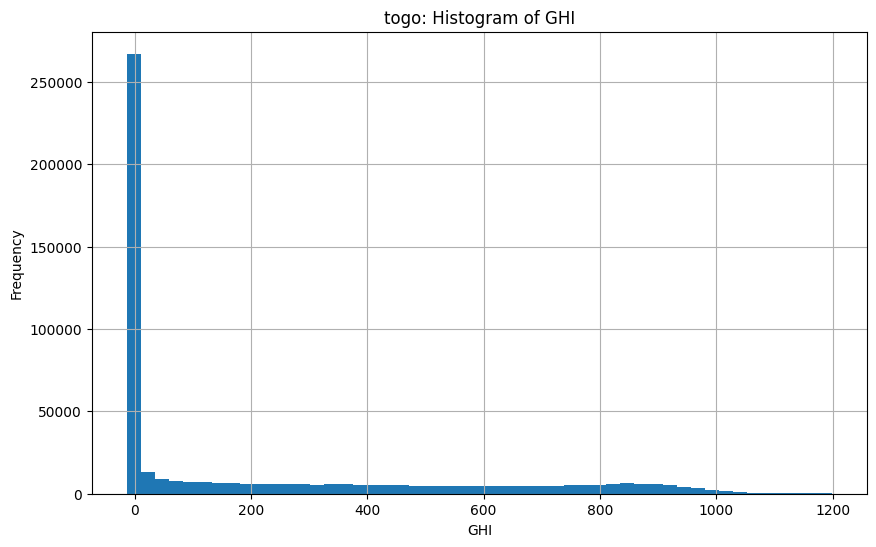

In [20]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_histogram

# Plot histogram for GHI
plot_histogram(togo_data_final, column='GHI', title='togo')


4.6 Bubble Chars

In [22]:
# notebooks/benin_analysis.ipynb

from scripts.eda import plot_bubble_chart

# Plot bubble chart for GHI vs Tamb vs WS
plot_bubble_chart(togo_data_final, x_col='GHI', y_col='Tamb', size_col='RH', title='togo')


ImportError: cannot import name 'plot_bubble_chart' from 'scripts.eda' (c:\Users\Matrix\Documents\00 TenX\week 0\w0-solar-farm-analysis\Notebooks\..\scripts\eda.py)